# Multiple Regression for Sklearn Datasets - Boston Housing

In [1]:
from sklearn import datasets
import pandas as pd

In [2]:
# Lets load the boston dataset from sklearn that would return the bunch
boston = datasets.load_boston()

In [3]:
# The first step would be to convert the dataset into DataFrame
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# You'll notice that the above dataframe does not contain the target element MEDV. That is because that is stored in target
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [5]:
# lets make this target a part of the dataframe as we want to find correlation
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# As we have all the features and target in one df now, lets find more about this df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
# Lets use describe to get some statistics about the df
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# Dataset looks good as there are no null values and rest of the values look good as well.
# Lets find the correlation to select the most appropriate features
correlation_matrix = df.corr()
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


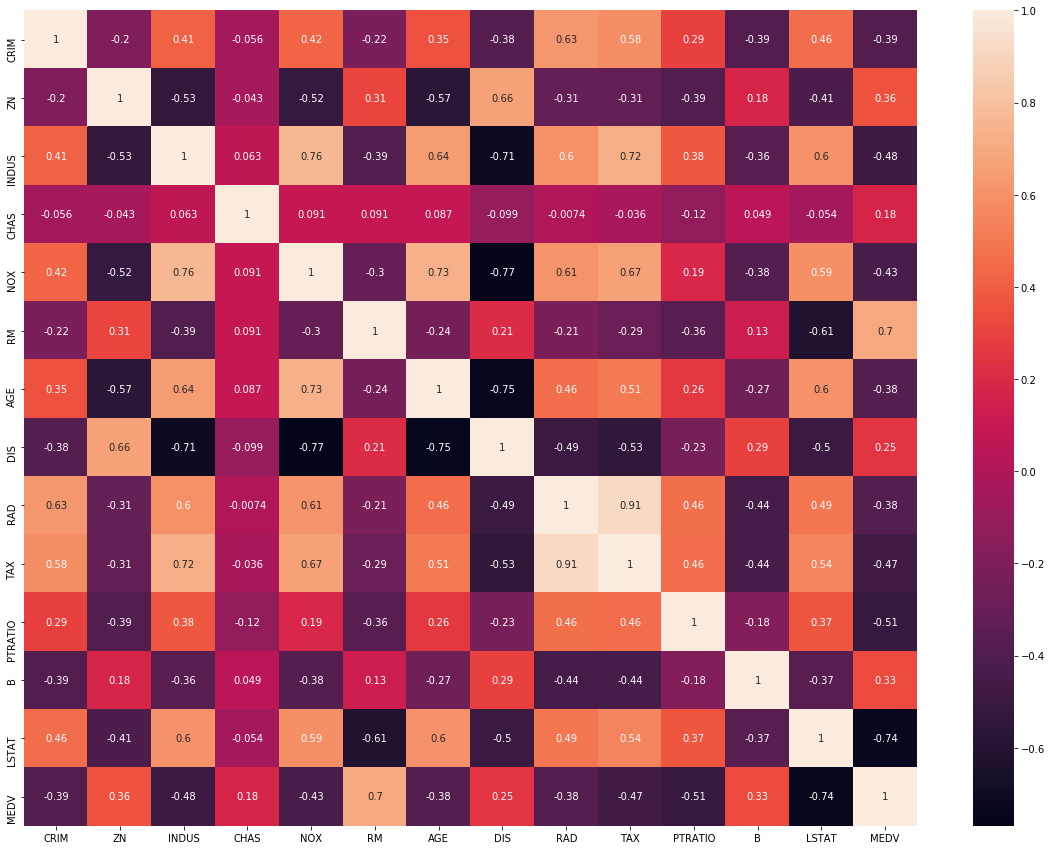

In [9]:
# Lets convert this correlation_matrix into heatmap for visual understanding of the correlation.
# For that lets use seaborn
import seaborn as sns 
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True)

## Modelling using 2 features

In [10]:
# From the above heatmap, it is evident, that two of the features are having a high corr with MEDV
# RM with 0.7 corr and LSTAT with -.74 corr
# For the purpose of this notebook, lets take only these 2 features
df_corr = df[['RM', 'LSTAT']]

In [11]:
# In order to work further with the data, lets first split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_corr, df['MEDV'], test_size=0.2)

In [12]:
# Lets see the summary of the data for each of module of test and train
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (404, 2)
X_test:  (102, 2)
y_train:  (404,)
y_test:  (102,)


In [13]:
# Lets fit the LinearRegression model to our train set data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Lets predict the dependent values
y_train_predict = lr.predict(X_train)
y_train_predict.shape

(404,)

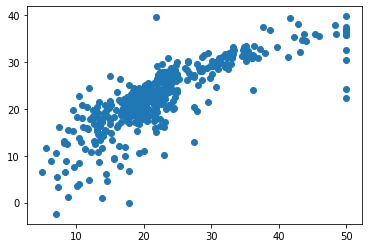

In [15]:
# Lets now plot to see how it looks like
plt.scatter(y_train, y_train_predict)

In [16]:
# In order to find how the model is doing, lets find Mean Squared, Root Mean Squared Error and R-Squared
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
print("MSE: ", mean_squared_error(y_train, y_train_predict))
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_predict)))
print("R-Squared: ", r2_score(y_train, y_train_predict))

MSE:  28.949529115491682
RMSE:  5.380476662479978
R-Squared:  0.6484760140408081


In [17]:
# The model looks pretty good based on above values, lets predict the values for test set now
y_test_predict = lr.predict(X_test)

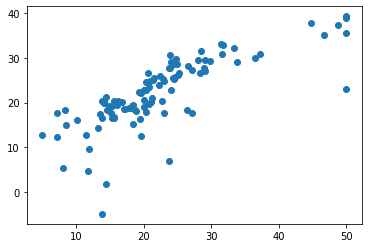

In [18]:
plt.scatter(y_test, y_test_predict)

In [19]:
# In order to find how the model is doing, lets find Mean Squared, Root Mean Squared Error and R-Squared
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
print("MSE: ", mean_squared_error(y_test, y_test_predict))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_predict)))
print("R-Squared: ", r2_score(y_test, y_test_predict))

MSE:  36.8352183009584
RMSE:  6.0692024435636025
R-Squared:  0.6020513996264707


## Modelling using all the features

In [21]:
# Lets split test and train for the whole dataset
# Lets first get the dataframe for features except the MEDV which is the target
df_all = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df_medv = pd.DataFrame(data=boston.target)
df_medv.columns = ['Price']

In [22]:
# lets check how our dataframes look like
df_all

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [23]:
df_medv

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [26]:
# Lets train and test split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(df_all, df_medv, test_size=0.2)

In [27]:
# Lets see the summary of the data for each of module of test and train
print("X_train: ", X_train_all.shape)
print("X_test: ", X_test_all.shape)
print("y_train: ", y_train_all.shape)
print("y_test: ", y_test_all.shape)

X_train:  (404, 13)
X_test:  (102, 13)
y_train:  (404, 1)
y_test:  (102, 1)


In [28]:
# Lets fit LinearRegression model
lr2 = LinearRegression()
lr2.fit(X_train_all, y_train_all)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_train_predict_all = lr2.predict(X_train_all)

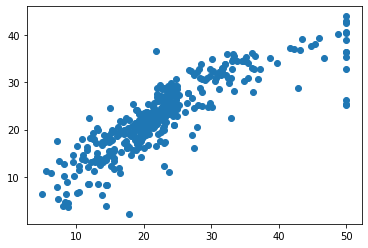

In [30]:
# Lets plot
plt.scatter(y_train_all, y_train_predict_all)

In [36]:
# In order to find how the model is doing, lets find Mean Squared, Root Mean Squared Error and R-Squared
print("MSE: ", mean_squared_error(y_train_all, y_train_predict_all))
print("RMSE: ", np.sqrt(mean_squared_error(y_train_all, y_train_predict_all)))
print("R-Squared: ", r2_score(y_train_all, y_train_predict_all))

MSE:  21.71453982411389
RMSE:  4.659886245834107
R-Squared:  0.7309717156683575


In [33]:
# Lets now predict the test set
y_test_predict_all = lr2.predict(X_test_all)

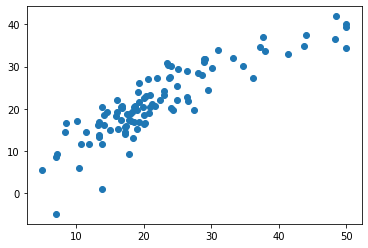

In [35]:
# Lets plot
plt.scatter(y_test_all, y_test_predict_all)

In [37]:
# In order to find how the model is doing, lets find Mean Squared, Root Mean Squared Error and R-Squared
print("MSE: ", mean_squared_error(y_test_all, y_test_predict_all))
print("RMSE: ", np.sqrt(mean_squared_error(y_test_all, y_test_predict_all)))
print("R-Squared: ", r2_score(y_test_all, y_test_predict_all))

MSE:  23.459105211165465
RMSE:  4.843460045377216
R-Squared:  0.7628931655212339


In [60]:
results = {"All Features": {"MSE": mean_squared_error(y_test_all, y_test_predict_all), 
                            "RMSE": np.sqrt(mean_squared_error(y_test_all, y_test_predict_all)), 
                            "R-Squared": r2_score(y_test_all, y_test_predict_all)},
          
          "2 Features": {"MSE": 36.8352183009584, 
                            "RMSE": 6.0692024435636025, 
                            "R-Squared": 0.6020513996264707}
          }

In [64]:
df_results = pd.DataFrame(results)
df_results

,All Features,2 Features
MSE,23.459105,36.835218
RMSE,4.843460,6.069202
R-Squared,0.762893,0.602051


Based on the comparison of both the models, it seems that the model where all the features are used is much more efficient than the one where only 2 features were used as MSE, RMSE and R-Squared are better for the model where all the features are used.